<a href="https://colab.research.google.com/github/yujiunzou/BA820-Unsupervised-ML-Project/blob/Yujiun-Zou/M2_Bob_Ross_Paintings_yujiunzou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - Bob Ross Paintings

Team ID: B1 Team 3

Name: Yu-Jiun Zou

Methods: Association Rules, Hierarchical Clustering, K-means Clustering

Q1: Do high-similarity pairs concentrate within the same season, suggesting localized style phases?

(*0–3 steps remain the same as in M1 because they cover data cleaning and the essential EDA required for building M2.  All additional procedures specific to the M2 workflow are labeled with “(M2)”.*)

##0.Load and Explore the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

##1.Data Overview

In [ ]:
print(f"Dataset size: {bob_ross.shape}")
print("\nColumn types:")

display(bob_ross.head())

Dataset size: (403, 27)

Column types:


,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [ ]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

In [ ]:
bob_ross.describe()

,painting_index,season,episode,num_colors
count,403.000000,403.00000,403.000000,403.000000
mean,208.712159,16.00000,7.000000,10.605459
std,117.901728,8.95539,3.746308,2.378525
min,4.000000,1.00000,1.000000,1.000000
25%,107.500000,8.00000,4.000000,9.000000
50%,210.000000,16.00000,7.000000,11.000000
75%,310.500000,24.00000,10.000000,12.000000
max,411.000000,31.00000,13.000000,15.000000


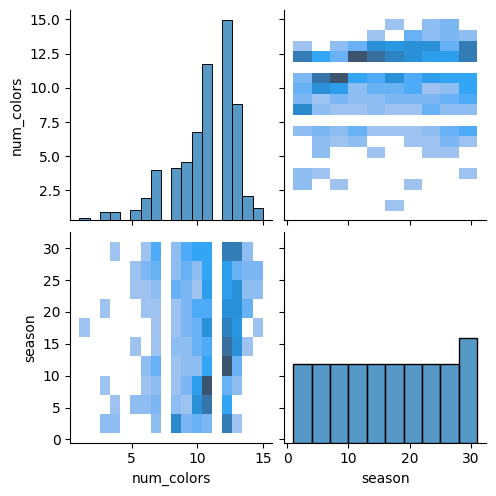

In [ ]:
sns.pairplot(bob_ross[['num_colors', 'season']], kind='hist')

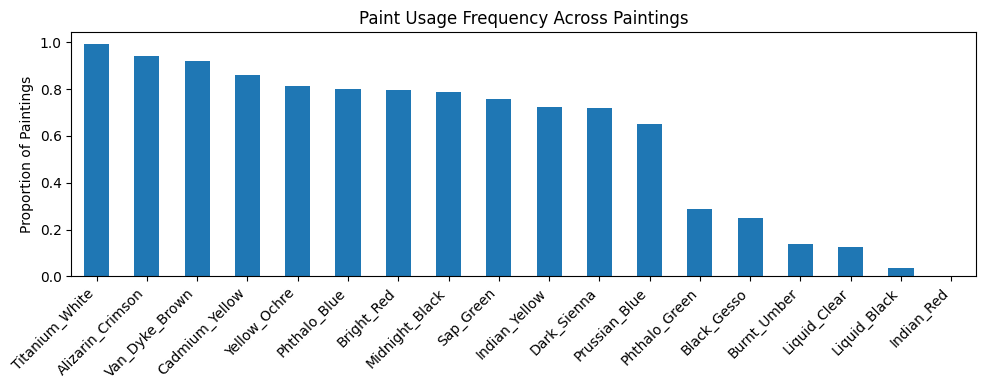

In [ ]:
binary_cols = [
    col for col in bob_ross.columns
    if bob_ross[col].dropna().isin([0, 1, True, False]).all()
]
paint_usage = bob_ross[binary_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
paint_usage.plot(kind='bar')
plt.ylabel('Proportion of Paintings')
plt.title('Paint Usage Frequency Across Paintings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The pairplot shows that the number of colors used in Bob Ross paintings is fairly consistent across seasons and episodes, with no stong temporal trend. This suggests that painting complexity is not driven by time but by artistic style.

##2.Checking for Missing Values and Duplicates

###2.1 Missing Values

In [ ]:
if "colors_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["colors_list"])
if "hex_list" in bob_ross.columns:
    bob_ross = bob_ross.drop(columns=["hex_list"])

# Missing Values
missing = bob_ross.isna().sum()
print("Total missing cells:", int(missing.sum()))

missing_cols = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:")
if len(missing_cols) == 0:
    print("No missing values.")
else:
    display(missing_cols)

Total missing cells: 0
Columns with missing values:
No missing values.


We checked missing values across all columns and the output shows no missing values.

###2.2 Duplicates

In [ ]:
# Duplicates
dup_painting_index = bob_ross["painting_index"].duplicated().sum()
print("Duplicate painting_index:", dup_painting_index)

dup_season_episode = bob_ross.duplicated(subset=["season", "episode"]).sum()
print("Duplicate (season, episode):", dup_season_episode)

if dup_season_episode > 0:
    dup_rows = bob_ross[bob_ross.duplicated(subset=["season","episode"], keep=False)]
    display(dup_rows[["painting_index","season","episode","painting_title"]].sort_values(["season","episode"]))

Duplicate painting_index: 0
Duplicate (season, episode): 0


We checked duplicates using two identifiers. Painting_index and the natural key (season, episode). The results show no duplicates.

###2.3 Range Checks

In [ ]:
# Range Checks
print("season min/max:", bob_ross["season"].min(), bob_ross["season"].max())
print("episode min/max:", bob_ross["episode"].min(), bob_ross["episode"].max())
print("num_colors min/max:", bob_ross["num_colors"].min(), bob_ross["num_colors"].max())

display(bob_ross[["season","episode","num_colors"]].describe())

season min/max: 1 31
episode min/max: 1 13
num_colors min/max: 1 15


,season,episode,num_colors
count,403.00000,403.000000,403.000000
mean,16.00000,7.000000,10.605459
std,8.95539,3.746308,2.378525
min,1.00000,1.000000,1.000000
25%,8.00000,4.000000,9.000000
50%,16.00000,7.000000,11.000000
75%,24.00000,10.000000,12.000000
max,31.00000,13.000000,15.000000


##3.Variable Exploration

###3.1 Summary statistics

In [ ]:
# Summary Statistics
print("Summary statistics of num_colors:")
display(bob_ross["num_colors"].describe())

Summary statistics of num_colors:


,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


###3.2 Distribution

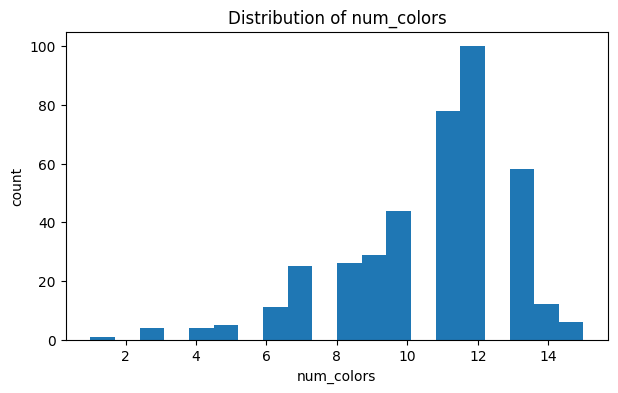

In [ ]:
# Distribution of num_colors
plt.figure(figsize=(7,4))
plt.hist(bob_ross["num_colors"], bins=20)
plt.title("Distribution of num_colors")
plt.xlabel("num_colors")
plt.ylabel("count")
plt.show()

The distribution of colors shows that most paintings use a moderate number of colors (9-13), indicating a consistent of visual complexity across works.

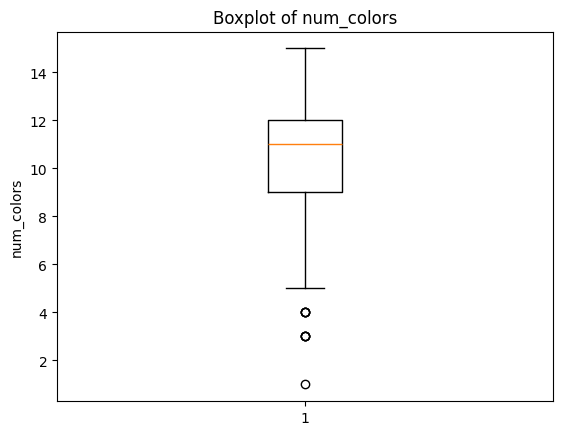

In [ ]:
plt.figure()
plt.boxplot(bob_ross["num_colors"].dropna())
plt.title("Boxplot of num_colors")
plt.ylabel("num_colors")
plt.show()

The boxplot shows that hte number of colors used in the paintings is tightly concentrated around the median, with only a few outliers.

##4.Identify Paint Indicator Columns and Imbalance

In [ ]:
paint_bool_cols = bob_ross.select_dtypes(include=["bool"]).columns.tolist()
print("Number of boolean paint columns:", len(paint_bool_cols))
print("Example paint columns:", paint_bool_cols[:8])

X_paint_df = bob_ross[paint_bool_cols].astype(int)

X_paint_mat = X_paint_df.to_numpy(dtype=bool)

Number of boolean paint columns: 18
Example paint columns: ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black']


The dataset contains 18 binary paint indicator columns, each representing whether a specific color is used in a painting.

Top 10 most used paints:


,0
Titanium_White,0.992556
Alizarin_Crimson,0.942928
Van_Dyke_Brown,0.920596
Cadmium_Yellow,0.858561
Yellow_Ochre,0.811414
Phthalo_Blue,0.801489
Bright_Red,0.796526
Midnight_Black,0.786600
Sap_Green,0.759305
Indian_Yellow,0.724566


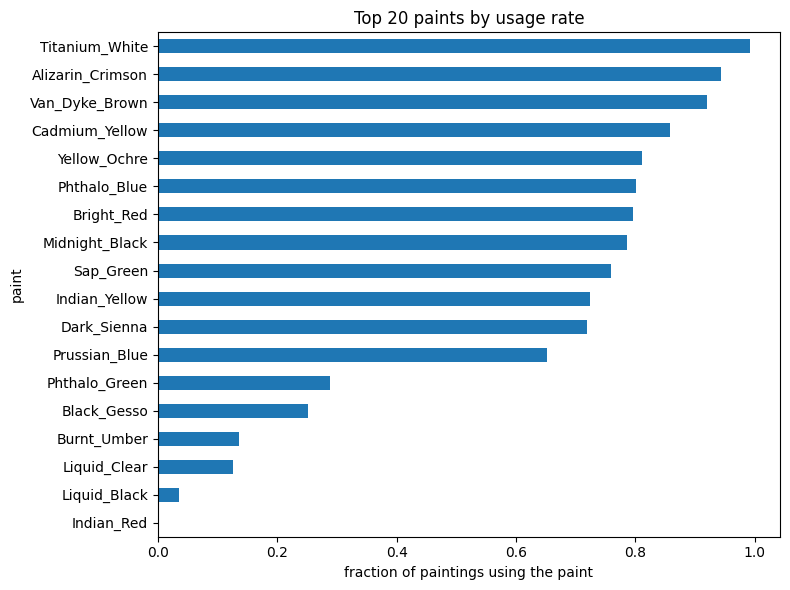

In [ ]:
X = bob_ross[binary_cols].copy()

for c in binary_cols:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

usage_rate = X.mean().sort_values(ascending=False)

print("Top 10 most used paints:")
display(usage_rate.head(10))

# Plot top 20 usage rates
topN = 20
plt.figure(figsize=(8,6))
usage_rate.head(topN).sort_values().plot(kind="barh")
plt.title(f"Top {topN} paints by usage rate")
plt.xlabel("fraction of paintings using the paint")
plt.ylabel("paint")
plt.tight_layout()
plt.show()

Paint usage is also highly imbalanced across the 18 indicators, where a small set of core paints appears in nearly all paintings, most notably Titanium White (0.9926), Alizarin Crimson (0.9429), and Van Dyke Brown (0.9206).

In [ ]:
paint_bool_cols = bob_ross.select_dtypes(include=["bool"]).columns.tolist()
print("Number of boolean paint columns:", len(paint_bool_cols))
print("Example paint columns:", paint_bool_cols[:8])

X_paint_df = bob_ross[paint_bool_cols].astype(int)
X_paint_mat = X_paint_df.to_numpy(dtype=bool)

Number of boolean paint columns: 18
Example paint columns: ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black']


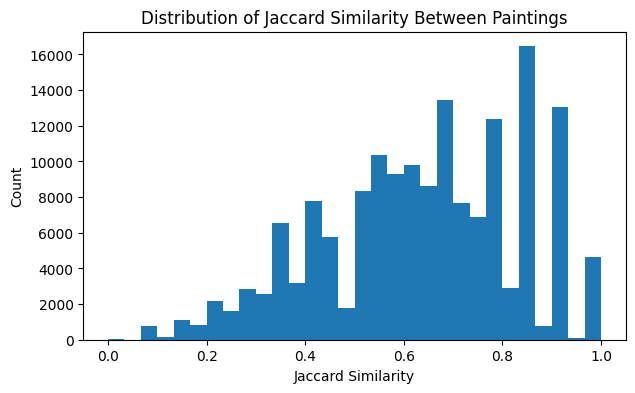

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


D = pairwise_distances(X_paint_mat, metric="jaccard")
S = 1 - D

np.fill_diagonal(S, np.nan)
sim_vals = S[~np.isnan(S)].ravel()

plt.figure(figsize=(7,4))
plt.hist(sim_vals, bins=30)
plt.title("Distribution of Jaccard Similarity Between Paintings")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Count")
plt.show()

The similarity distribution shows that most paintings share a moderate to high level of paint overlap, and the most common exact paint recipe appears in dozens of paintings. This pattern indicates a consistent core palette across Bob Ross's work.

This similarity structure motivate the use of clustering methods to identify goups of paintings with similar color palettes.

###4.1 Similarity Robustness Check (M2)

The proposal-stage EDA established that paint usage is highly imbalanced and that overall Jaccard similarity is high. Building on this, we conducted an ablation-style sensitivity analysis by recomputing pairwise similarities after removing the most universally used paint (Titanium White) to assess whether high similarity is primarily driven by base paint popularity.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
X_all = bob_ross[binary_cols]
binary_cols_no_tw = [c for c in binary_cols if c != 'Titanium_White']
X_no_tw = bob_ross[binary_cols_no_tw]

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Case with all colors
dist_all = pairwise_distances(X_all.values, metric='jaccard')
sim_all = 1 - dist_all

# Case without titanium white
dist_no_tw = pairwise_distances(X_no_tw.values, metric='jaccard')
sim_no_tw = 1 - dist_no_tw

In [ ]:
def upper_triangle_values(sim_matrix):
    idx = np.triu_indices_from(sim_matrix, k=1)
    return sim_matrix[idx]

sim_vals_all = upper_triangle_values(sim_all)
sim_vals_no_tw = upper_triangle_values(sim_no_tw)

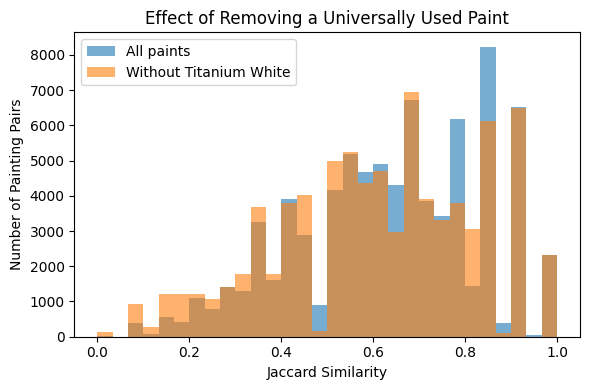

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(sim_vals_all, bins=30, alpha=0.6, label='All paints')
plt.hist(sim_vals_no_tw, bins=30, alpha=0.6, label='Without Titanium White')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Number of Painting Pairs')
plt.legend()
plt.title('Effect of Removing a Universally Used Paint')
plt.tight_layout()
plt.show()

Even after removing Titanium White, most paintings remain highly similar in their color palettes. This suggests that Bob Ross’s consistent visual style comes from coordinated color choices, not dependence on any one dominant color.

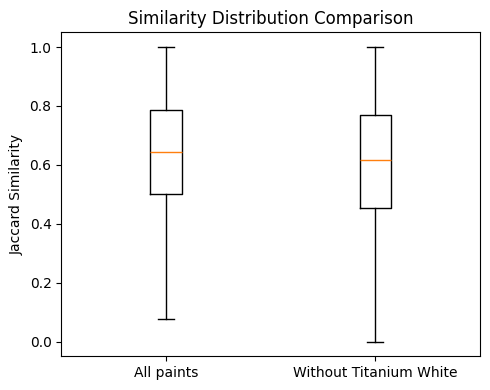

In [ ]:
plt.figure(figsize=(5,4))
plt.boxplot(
    [sim_vals_all, sim_vals_no_tw],
    labels=['All paints', 'Without Titanium White'],
    showfliers=False
)
plt.ylabel('Jaccard Similarity')
plt.title('Similarity Distribution Comparison')
plt.tight_layout()
plt.show()

Comparing similarity distributions before and after removing Titanium White. While a slight downward shift in median similarity is observed, the overall distribution remains largely overlapping. This suggests that palette similarity in Bob Ross paintings is not solely driven by a single universally used paint, but rather reflects broader, multi-paint co-usage patterns.

## 5.Text Analysis (M2)

###5.1 Text Distribution

In [ ]:
bob_ross["title_len"] = bob_ross["painting_title"].str.split().apply(len)
bob_ross["title_len"].describe()

,title_len
count,403.000000
mean,2.454094
std,0.785282
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


The painting titles are generally short, with a median length of two words and a maximum of five words. This indicates that titles tend to emphasize a small number of salient concepts rather than detailed descriptions.

In [ ]:
from collections import Counter

words = (bob_ross["painting_title"].str.lower()
    .str.replace("[^a-z ]", "", regex=True)
    .str.split()
    .sum())
stopwords = {"the", "of", "a", "in", "on", "at", "and"}

words_clean = [w for w in words if w not in stopwords]
word_freq = Counter(words_clean)

In [ ]:
filtered_words = pd.Series(words_clean)
filtered_words.value_counts().head(10)

,count
mountain,45
winter,37
oval,21
autumn,18
lake,16
cabin,15
sunset,13
stream,11
waterfall,11
forest,10


Frequent title words are dominated by landscape features, seasonal references, and natural scenery, suggesting a strong thematic consistency in how paintings are named.

In [ ]:
keyword_groups = {
    "landscape": {"mountain", "valley", "meadow", "forest", "woods"},
    "water": {"lake", "river", "stream", "waterfall", "falls"},
    "season_time": {"winter", "autumn", "day", "sunset"},
    "objects_view": {"cabin", "barn", "view", "oval"},}

dim_counts = {
    dim: sum(w in kws for w in words_clean)
    for dim, kws in keyword_groups.items()}

pd.Series(dim_counts)

,0
landscape,79
water,54
season_time,78
objects_view,54


Aggregating title words into thematic groups reveals that landscape and seasonal references are the most prominent dimensions, followed by water-related features and specific scenic objects. This structured distribution suggests that painting titles encode recurring high-level themes rather than isolated keywords.

###5.2 Text Similarity

In [ ]:
import re
title_sets = (
    bob_ross["painting_title"]
    .str.lower()
    .str.replace(r"[^a-z ]", "", regex=True)
    .str.split()
    .apply(set))

In [ ]:
n = len(title_sets)
S_text = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        A = title_sets.iloc[i]
        B = title_sets.iloc[j]
        if len(A | B) > 0:
            sim = len(A & B) / len(A | B)
        else:
            sim = 0
        S_text[i, j] = sim
        S_text[j, i] = sim

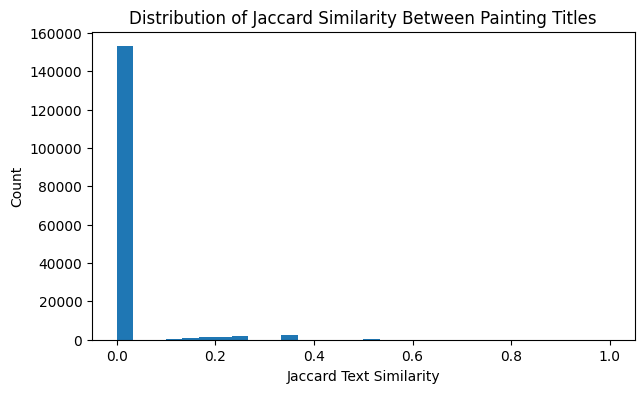

In [ ]:
np.fill_diagonal(S_text, np.nan)
sim_text_vals = S_text[~np.isnan(S_text)].ravel()


plt.figure(figsize=(7,4))
plt.hist(sim_text_vals, bins=30)
plt.xlabel("Jaccard Text Similarity")
plt.ylabel("Count")
plt.title("Distribution of Jaccard Similarity Between Painting Titles")
plt.show()


Pairwise Jaccard similarity between painting titles is heavily concentrated near zero, indicating minimal lexical overlap across most title pairs. Only a small number of pairs exhibit moderate to high similarity, reflecting occasional reuse of specific words rather than pervasive redundancy.

##6.Association Rules (M2)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client")

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
X = bob_ross[binary_cols].drop(columns=['Titanium_White'])
itemsets = apriori(X, min_support=0.000001, use_colnames=True)
itemsets.sort_values(by="support")

,support,itemsets
24795,0.002481,"(Black_Gesso, Bright_Red, Phthalo_Blue, Van_Dy..."
24794,0.002481,"(Black_Gesso, Bright_Red, Van_Dyke_Brown, Burn..."
24791,0.002481,"(Black_Gesso, Bright_Red, Phthalo_Blue, Van_Dy..."
24790,0.002481,"(Black_Gesso, Bright_Red, Phthalo_Blue, Burnt_..."
24789,0.002481,"(Black_Gesso, Bright_Red, Phthalo_Blue, Van_Dy..."
...,...,...
69,0.831266,"(Alizarin_Crimson, Cadmium_Yellow)"
3,0.858561,(Cadmium_Yellow)
141,0.878412,"(Van_Dyke_Brown, Alizarin_Crimson)"
14,0.920596,(Van_Dyke_Brown)


In [ ]:
X = bob_ross[binary_cols].drop(columns=['Titanium_White'])
frequent_itemsets = apriori(X, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by="support")

,support,itemsets
5519,0.052109,"(Bright_Red, Van_Dyke_Brown, Burnt_Umber, Indi..."
7667,0.052109,"(Phthalo_Blue, Van_Dyke_Brown, Indian_Yellow, ..."
7669,0.052109,"(Phthalo_Blue, Indian_Yellow, Alizarin_Crimson..."
7672,0.052109,"(Phthalo_Blue, Van_Dyke_Brown, Indian_Yellow, ..."
6170,0.052109,"(Phthalo_Blue, Bright_Red, Van_Dyke_Brown, Liq..."
...,...,...
60,0.831266,"(Alizarin_Crimson, Cadmium_Yellow)"
3,0.858561,(Cadmium_Yellow)
113,0.878412,"(Van_Dyke_Brown, Alizarin_Crimson)"
12,0.920596,(Van_Dyke_Brown)


A minimum support threshold of 0.05 was used to focus on color combinations that appear in a substantial proportion of paintings, reducing noise from rare or idiosyncratic patterns.

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6) #, metric="support", min_threshold=0.05
rules.sort_values(by=["support", "confidence"])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1959,"(Liquid_Clear, Indian_Yellow)","(Black_Gesso, Cadmium_Yellow)",0.086849,0.220844,0.052109,0.600000,2.716854,1.0,0.032929,1.947891,0.692029,0.203883,0.486624,0.417978
2313,"(Liquid_Clear, Indian_Yellow)","(Black_Gesso, Midnight_Black)",0.086849,0.210918,0.052109,0.600000,2.844706,1.0,0.033791,1.972705,0.710145,0.212121,0.493082,0.423529
4280,"(Bright_Red, Liquid_Clear)","(Sap_Green, Prussian_Blue)",0.086849,0.513648,0.052109,0.600000,1.168116,1.0,0.007500,1.215881,0.157609,0.095023,0.177551,0.350725
10930,"(Liquid_Clear, Indian_Yellow)","(Black_Gesso, Midnight_Black, Cadmium_Yellow)",0.086849,0.193548,0.052109,0.600000,3.100000,1.0,0.035300,2.016129,0.741848,0.228261,0.504000,0.434615
10941,"(Liquid_Clear, Indian_Yellow)","(Black_Gesso, Alizarin_Crimson, Cadmium_Yellow)",0.086849,0.205955,0.052109,0.600000,2.913253,1.0,0.034222,1.985112,0.719203,0.216495,0.496250,0.426506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,(Cadmium_Yellow),(Van_Dyke_Brown),0.858561,0.920596,0.811414,0.945087,1.026604,1.0,0.021027,1.445997,0.183218,0.838462,0.308436,0.913244
59,(Alizarin_Crimson),(Cadmium_Yellow),0.942928,0.858561,0.831266,0.881579,1.026810,1.0,0.021704,1.194376,0.457495,0.856777,0.162742,0.924894
60,(Cadmium_Yellow),(Alizarin_Crimson),0.858561,0.942928,0.831266,0.968208,1.026810,1.0,0.021704,1.795173,0.184603,0.856777,0.442950,0.924894
146,(Alizarin_Crimson),(Van_Dyke_Brown),0.942928,0.920596,0.878412,0.931579,1.011931,1.0,0.010357,1.160527,0.206583,0.891688,0.138322,0.942878


While many rules meet the confidence threshold, only a subset shows substantially elevated lift, implying meaningful color dependencies beyond overall frequency effects. Conversely, dominant pigments like Van Dyke Brown and Alizarin Crimson form high-support but low-lift rules, reflecting their widespread use across paintings rather than strong mutual association.

In [ ]:
rules_filtered = rules[(rules['lift'] >= 2)]

print(rules_filtered[['confidence', 'lift']].mean())
rules_filtered.sort_values(by=["confidence", "lift"]).head(5)

confidence    0.804124
lift          2.343964
dtype: float64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4951,"(Burnt_Umber, Sap_Green)","(Phthalo_Green, Cadmium_Yellow)",0.124069,0.272953,0.074442,0.6,2.198182,1.0,0.040577,1.817618,0.622285,0.230769,0.449829,0.436364
22327,"(Van_Dyke_Brown, Burnt_Umber, Sap_Green)","(Phthalo_Green, Cadmium_Yellow)",0.124069,0.272953,0.074442,0.6,2.198182,1.0,0.040577,1.817618,0.622285,0.230769,0.449829,0.436364
22352,"(Alizarin_Crimson, Burnt_Umber, Sap_Green)","(Phthalo_Green, Cadmium_Yellow)",0.124069,0.272953,0.074442,0.6,2.198182,1.0,0.040577,1.817618,0.622285,0.230769,0.449829,0.436364
69011,"(Van_Dyke_Brown, Alizarin_Crimson, Burnt_Umber...","(Phthalo_Green, Cadmium_Yellow)",0.124069,0.272953,0.074442,0.6,2.198182,1.0,0.040577,1.817618,0.622285,0.230769,0.449829,0.436364
22356,"(Burnt_Umber, Sap_Green)","(Phthalo_Green, Alizarin_Crimson, Cadmium_Yellow)",0.124069,0.270471,0.074442,0.6,2.218349,1.0,0.040884,1.823821,0.627007,0.232558,0.451701,0.437615


After filtering rules with lift ≥ 2, the remaining associations show relatively high confidence (mean = 0.80) and elevated lift (mean = 2.34), indicating that the retained rules capture meaningful color co-occurrence patterns rather than marginal threshold effects.

Restricting the analysis to single-antecedent and single-consequent rules highlights a small number of stable pigment pairs with elevated lift, whereas the majority of color pairs exhibit lift values close to unity. This pattern implies that strong pairwise dependencies are relatively rare compared to broadly shared palette usage.

In [ ]:
rules_filtered = rules_filtered.copy()
rules_filtered["ante_len"] = rules_filtered["antecedents"].apply(len)
rules_filtered["cons_len"] = rules_filtered["consequents"].apply(len)
pair_rules = rules_filtered[(rules_filtered["ante_len"] == 1) &(rules_filtered["cons_len"] == 1)
].sort_values(by="lift", ascending=False)

pair_rules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         0 non-null      object 
 1   consequents         0 non-null      object 
 2   antecedent support  0 non-null      float64
 3   consequent support  0 non-null      float64
 4   support             0 non-null      float64
 5   confidence          0 non-null      float64
 6   lift                0 non-null      float64
 7   representativity    0 non-null      float64
 8   leverage            0 non-null      float64
 9   conviction          0 non-null      float64
 10  zhangs_metric       0 non-null      float64
 11  jaccard             0 non-null      float64
 12  certainty           0 non-null      float64
 13  kulczynski          0 non-null      float64
 14  ante_len            0 non-null      int64  
 15  cons_len            0 non-null      int64  
dtypes: float64(12), int64(2),

When restricting the analysis to one-to-one rules with lift below 2, most pigment pairs exhibit only modest associative strength, indicating limited pairwise dependence beyond overall color frequency. This suggests that Bob Ross’s palette structure is largely driven by broadly shared base colors rather than strong exclusive color pairings.

In [ ]:
multi_rules = rules_filtered[(rules_filtered["ante_len"] > 1) |(rules_filtered["cons_len"] > 1)
].sort_values(by="lift", ascending=False)
multi_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,ante_len,cons_len
394535,"(Phthalo_Blue, Bright_Red, Burnt_Umber, Indian...","(Van_Dyke_Brown, Sap_Green, Yellow_Ochre, Phth...",0.081886,0.210918,0.059553,0.727273,3.448128,1.0,0.042282,2.893300,0.773311,0.255319,0.654374,0.504813,4,6
394442,"(Phthalo_Blue, Bright_Red, Burnt_Umber, Indian...","(Van_Dyke_Brown, Sap_Green, Yellow_Ochre, Phth...",0.081886,0.210918,0.059553,0.727273,3.448128,1.0,0.042282,2.893300,0.773311,0.255319,0.654374,0.504813,5,5
314607,"(Phthalo_Blue, Bright_Red, Burnt_Umber, Indian...","(Van_Dyke_Brown, Sap_Green, Yellow_Ochre, Phth...",0.081886,0.210918,0.059553,0.727273,3.448128,1.0,0.042282,2.893300,0.773311,0.255319,0.654374,0.504813,4,5
394547,"(Phthalo_Blue, Burnt_Umber, Cadmium_Yellow, In...","(Bright_Red, Van_Dyke_Brown, Sap_Green, Yellow...",0.086849,0.200993,0.059553,0.685714,3.411640,1.0,0.042097,2.542296,0.774117,0.260870,0.606655,0.491005,4,6
394472,"(Phthalo_Blue, Burnt_Umber, Indian_Yellow, Ali...","(Bright_Red, Van_Dyke_Brown, Sap_Green, Yellow...",0.086849,0.200993,0.059553,0.685714,3.411640,1.0,0.042097,2.542296,0.774117,0.260870,0.606655,0.491005,5,5


Multi-item association rules exhibit substantially higher lift values, indicating that specific groups of pigments tend to co-occur as cohesive palette combinations. These patterns suggest structured color usage at the composition level rather than isolated pairwise relationships.

In [198]:
#top 5 multi-item association
for a, c in zip(
    multi_rules["antecedents"].head(5),
    multi_rules["consequents"].head(5)
):
    print("Antecedents:", a)
    print("Consequents:", c)
    print("-" * 40)

Antecedents: frozenset({'Phthalo_Blue', 'Bright_Red', 'Burnt_Umber', 'Indian_Yellow'})
Consequents: frozenset({'Van_Dyke_Brown', 'Sap_Green', 'Yellow_Ochre', 'Phthalo_Green', 'Alizarin_Crimson', 'Cadmium_Yellow'})
----------------------------------------
Antecedents: frozenset({'Phthalo_Blue', 'Bright_Red', 'Burnt_Umber', 'Indian_Yellow', 'Alizarin_Crimson'})
Consequents: frozenset({'Van_Dyke_Brown', 'Sap_Green', 'Yellow_Ochre', 'Phthalo_Green', 'Cadmium_Yellow'})
----------------------------------------
Antecedents: frozenset({'Phthalo_Blue', 'Bright_Red', 'Burnt_Umber', 'Indian_Yellow'})
Consequents: frozenset({'Van_Dyke_Brown', 'Sap_Green', 'Yellow_Ochre', 'Phthalo_Green', 'Cadmium_Yellow'})
----------------------------------------
Antecedents: frozenset({'Phthalo_Blue', 'Burnt_Umber', 'Cadmium_Yellow', 'Indian_Yellow'})
Consequents: frozenset({'Bright_Red', 'Van_Dyke_Brown', 'Sap_Green', 'Yellow_Ochre', 'Phthalo_Green', 'Alizarin_Crimson'})
----------------------------------------


After excluding near-universal paints and controlling for base usage rates, no single color pair exhibits extremely high lift. Instead, strong associations emerge only at the level of multi-color combinations, indicating that Bob Ross’s palette structure is driven by coordinated color sets rather than isolated color pairings. This suggests that stylistic consistency is achieved through broader palette composition rather than binary color relationships.

##7.Clustering (M2)

###7.1 Hierarchical Clustering

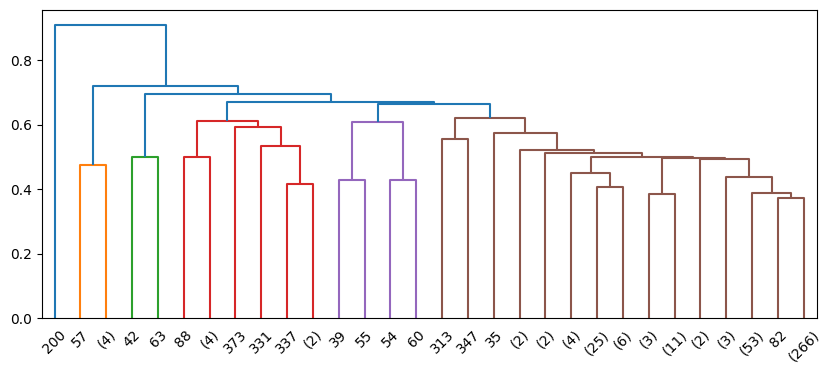

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

X_all = bob_ross[binary_cols]
Z = linkage(X_all, method="average", metric="jaccard")
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode="lastp")
plt.show()

In [ ]:
n_clusters = 5
bob_ross['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)
bob_ross['cluster_labels'].value_counts()

,count
cluster_labels,
4,385
3,10
1,5
2,2
5,1


In [ ]:
cluster_palette_hier = (bob_ross.groupby('cluster_labels')[binary_cols].mean())
cluster_palette_hier

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster_labels,,,,,,,,,,,,,,,,,,
1,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.400000
2,0.500000,1.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.500000,0.100000,0.000000,0.100000,0.000000,0.000000,0.200000,0.000000,0.300000,0.8,0.600000,0.000000,0.900000,0.500000,0.900000,0.000000,0.000000,0.600000
4,0.244156,0.825974,0.137662,0.893506,0.753247,0.002597,0.748052,0.033766,0.124675,0.8,0.823377,0.301299,0.641558,0.781818,0.997403,0.948052,0.849351,0.966234
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


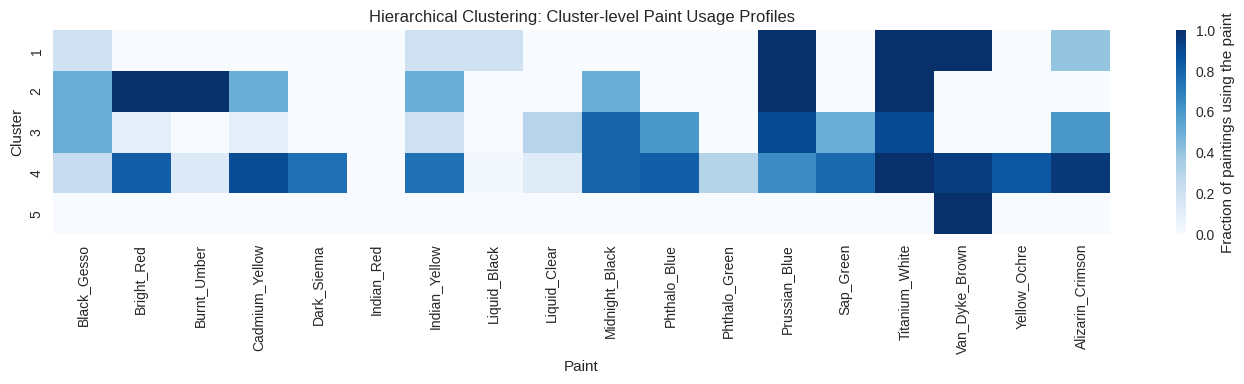

In [ ]:
plt.figure(figsize=(14, 4))
sns.heatmap(
    cluster_palette_hier,
    cmap="Blues",
    cbar_kws={"label": "Fraction of paintings using the paint"})

plt.title("Hierarchical Clustering: Cluster-level Paint Usage Profiles")
plt.ylabel("Cluster")
plt.xlabel("Paint")
plt.tight_layout()
plt.show()


Hierarchical clustering using Jaccard distance reveals a dominant cluster encompassing most paintings, indicating a highly consistent core palette across Bob Ross’s work. Smaller clusters capture paintings with atypical or minimal color usage, suggesting palette-level variation rather than strong pairwise color dependencies.

Although the cluster sizes are unbalanced, this reflects the underlying consistency of Bob Ross’s palette rather than a limitation of the clustering method.

###7.2 K-means Clustering (Binary paint vectors)

K-means was included as a baseline to assess the robustness of the observed patterns across different clustering methodologies.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

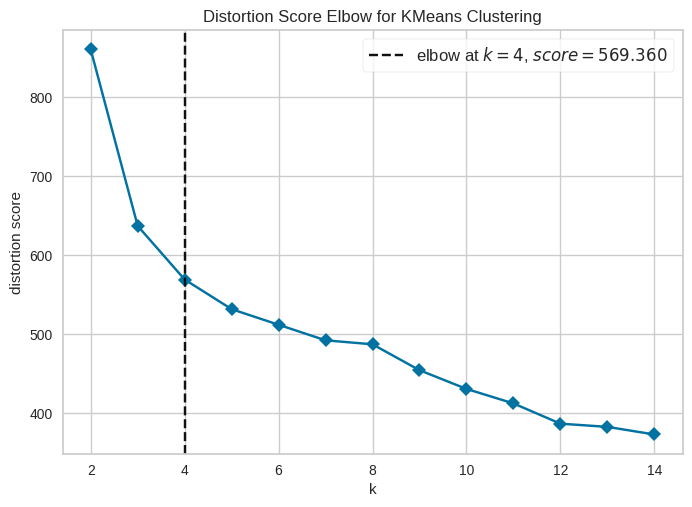

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [194]:
#Elbow method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(clustering,k=(2, 15),metric="distortion",  timings=False)

visualizer.fit(X)
visualizer.show()

The number of clusters was determined using the elbow method based on distortion scores. As shown in the elbow plot, the reduction in distortion decreases substantially after k = 4, indicating diminishing marginal improvement from adding more clusters. Therefore, k = 4 was selected as a reasonable trade-off between model simplicity and explanatory power.

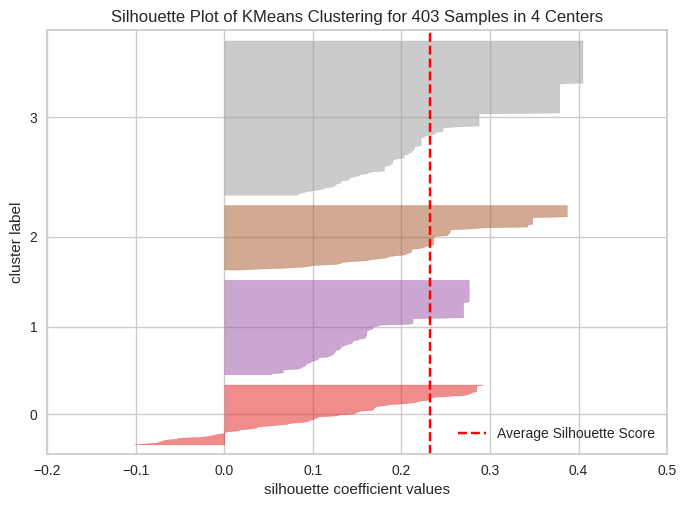

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 403 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [195]:
from yellowbrick.cluster import SilhouetteVisualizer

n_clusters = 4

kmeans_model = KMeans(n_clusters=n_clusters,random_state=42,n_init=10)

visualizer = SilhouetteVisualizer(kmeans_model,timings=False)
visualizer.fit(X)
visualizer.show()

The average silhouette score is modest, indicating that the resulting clusters are only moderately separated rather than clearly distinct.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters,random_state=42,n_init=10)

bob_ross["cluster_kmeans"] = kmeans.fit_predict(X).astype(str)
bob_ross["cluster_kmeans"].value_counts()

,count
cluster_kmeans,
3,166
1,102
2,70
0,65


K-means clustering was applied to binary paint usage vectors with n_clusters = 4. A fixed random seed (random_state = 42) and multiple initializations (n_init = 10) were used to ensure stability and reproducibility of the results. All other parameters were kept at their default values.

The resulting clusters are relatively balanced in size, indicating that K-means partitions the paintings into broad groups rather than isolating small outlier clusters.

In [ ]:
cluster_palette_km = (bob_ross.groupby("cluster_kmeans")[binary_cols].mean())
cluster_palette_km

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster_kmeans,,,,,,,,,,,,,,,,,,
0,0.261538,0.230769,0.030769,0.261538,0.584615,0.000000,0.107692,0.046154,0.169231,0.769231,0.584615,0.123077,0.753846,0.169231,0.969231,0.738462,0.169231,0.738462
1,0.343137,0.882353,0.000000,0.950980,0.892157,0.000000,0.862745,0.019608,0.127451,0.980392,0.931373,0.098039,0.000000,0.764706,1.000000,0.901961,0.950980,0.960784
2,0.171429,0.857143,0.757143,0.971429,0.000000,0.000000,0.657143,0.028571,0.000000,0.014286,0.714286,0.685714,0.685714,0.928571,0.985714,1.000000,0.771429,1.000000
3,0.222892,0.939759,0.000000,0.987952,0.969880,0.006024,0.909639,0.042169,0.162651,1.000000,0.843373,0.301205,1.000000,0.915663,1.000000,0.969880,0.993976,0.987952


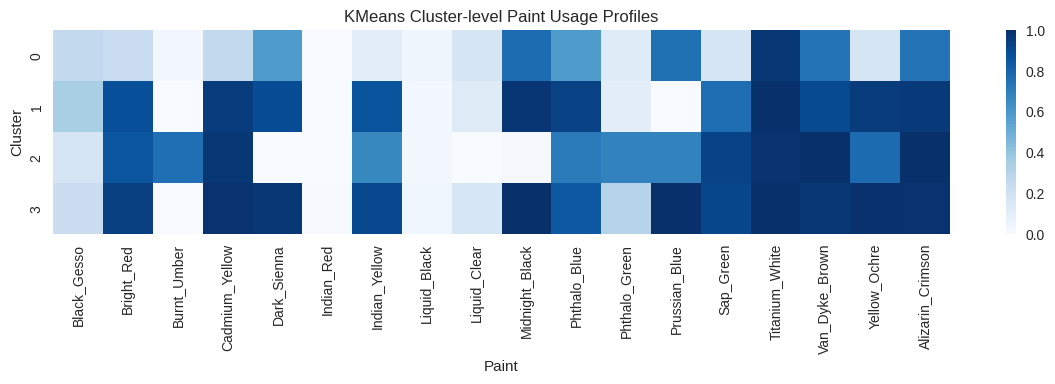

In [196]:
plt.figure(figsize=(12, 4))
sns.heatmap(cluster_palette_km, cmap="Blues")
plt.title("KMeans Cluster-level Paint Usage Profiles")
plt.ylabel("Cluster")
plt.xlabel("Paint")
plt.tight_layout()
plt.show()

K-means clustering identifies a small number of broad groups that mainly reflect differences in overall paint usage frequency. While the clusters are relatively balanced, they show limited differentiation in specific color combinations, suggesting that K-means captures intensity-based variation rather than structured palette patterns in binary paint data.

Compared to hierarchical clustering with Jaccard distance, K-means produces more evenly sized clusters but offers less interpretable palette-level structure. This highlights the limitations of centroid-based methods when applied to sparse binary features.

### Additional:Trying Hierarchical Clustering with binary and text data

In [197]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
stopwords = {"the","of","a","in","on","at","and","to","with","by","for"}

title_sets = (
    bob_ross["painting_title"]
    .str.lower()
    .str.replace(r"[^a-z ]", "", regex=True)
    .str.split()
    .apply(lambda x: {w for w in x if w not in stopwords}))

In [ ]:
mlb = MultiLabelBinarizer()
X_title = mlb.fit_transform(title_sets)
X_paint = bob_ross[binary_cols].values

In [ ]:
D_title = pairwise_distances(X_title, metric="jaccard")
D_paint = pairwise_distances(X_paint, metric="jaccard")

#D_fused = w_paint * D_paint + w_title * D_title
D_fused = 0.9 * D_paint + 0.1 * D_title

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
D_paint.mean(), D_title.mean()

(np.float64(0.36447830492065403), np.float64(0.985617880078778))

In [ ]:
D_fused = 0.9 * D_paint + 0.1 * D_title
D_fused.mean()

np.float64(0.42659226243646636)

Because title-based Jaccard distances were close to 1 for most painting pairs, indicating minimal lexical overlap, we assigned substantially lower weight to text-based distance when fusing similarities, preventing title noise from overwhelming color-based structure.

/tmp/ipython-input-2549597065.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D_fused, method="average")


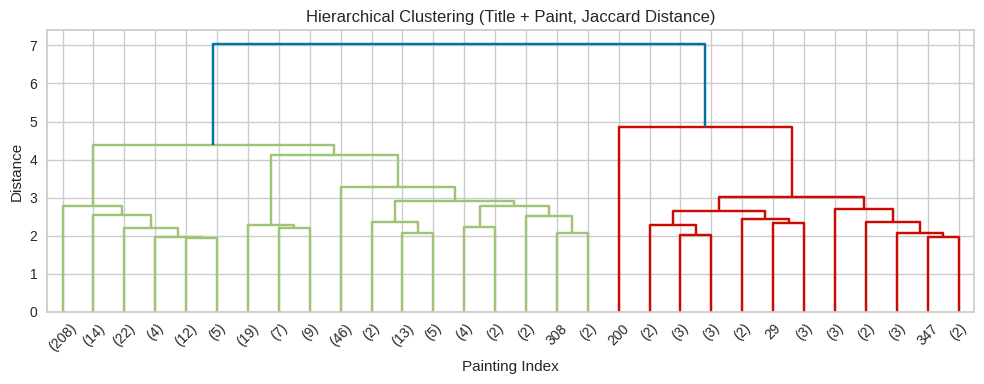

In [ ]:
Z = linkage(D_fused, method="average")

plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode="lastp")
plt.title("Hierarchical Clustering (Title + Paint, Jaccard Distance)")
plt.xlabel("Painting Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [ ]:
labels_4 = fcluster(Z, t=5, criterion="maxclust")
pd.Series(labels_4).value_counts()

,count
1,265
3,77
2,35
4,25
5,1


In [ ]:
cluster_paint_profile = (
    bob_ross
    .groupby("cluster_combined")[binary_cols]
    .mean())

cluster_paint_profile

,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
cluster_combined,,,,,,,,,,,,,,,,,,
1,0.240854,0.920732,0.146341,0.978659,0.756098,0.003049,0.856707,0.030488,0.115854,0.801829,0.853659,0.320122,0.649390,0.884146,1.000000,0.957317,0.942073,0.984756
2,0.234043,0.297872,0.000000,0.340426,0.893617,0.000000,0.063830,0.021277,0.170213,0.957447,0.723404,0.127660,0.765957,0.148936,1.000000,0.914894,0.255319,0.829787
3,0.407407,0.185185,0.259259,0.333333,0.000000,0.000000,0.296296,0.111111,0.185185,0.333333,0.333333,0.185185,0.518519,0.333333,0.925926,0.481481,0.222222,0.666667
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
for c in sorted(bob_ross["cluster_combined"].unique()):
    words = [
        w
        for s in title_sets[bob_ross["cluster_combined"] == c]
        for w in s
    ]
    print(f"Cluster {c}:")
    print(Counter(words).most_common(5))
    print("-" * 50)

Cluster 1:
[('mountain', 42), ('autumn', 18), ('lake', 16), ('oval', 15), ('sunset', 13)]
--------------------------------------------------
Cluster 2:
[('winter', 20), ('oval', 5), ('cabin', 3), ('solitude', 3), ('barn', 3)]
--------------------------------------------------
Cluster 3:
[('winter', 8), ('snow', 3), ('grey', 2), ('night', 2), ('falls', 2)]
--------------------------------------------------
Cluster 4:
[('lady', 1), ('contemplative', 1)]
--------------------------------------------------


Cluster interpretation using title keywords revealed clear semantic themes. The largest cluster is characterized by mountain and autumn landscapes, while smaller clusters emphasize winter scenes with cabins or darker nocturnal imagery. A small outlier cluster contains non-landscape or conceptual titles, highlighting rare deviations from the dominant landscape style.

#Questions:

- Do high-similarity pairs concentrate within the same season, suggesting localized style phases?

- To what extent do the most frequently used paints drive overall similarity, how does the similarity distribution change if the top one or two paints are removed from the feature set?

- Has palette similarity increased over time, are paintings in later seasons more similar to their nearest neighbors than paintings in earlier seasons?

- Which paint pairs form the most stable combinations once base paint popularity is accounted for?
